In [15]:
# impoart lib
from scipy.io import loadmat
import numpy as np
from sklearn.cluster import *
import random
import scipy.spatial.distance as dist
import math
import matplotlib.pyplot as plt
from sklearn.neural_network import BernoulliRBM
from sklearn import metrics
from sklearn.datasets import make_blobs
import matplotlib as mpl
mpl.rc('figure', max_open_warning = 0)

### For this method, the hyper parameter you need to adjust is "n_clusters" and "method" 
#### there are four methods: 'ward', 'average', 'complete', 'single'

## preprocess

In [2]:
num_used = 10000

## load data
raw = loadmat("../wind_data.mat")
heights = raw['alt']
rawdata = raw['hvel']

### first, we sample the data for there are too many data points
# and we discard those with value nan

used_data_idx = random.sample(range(len(rawdata)), num_used)
data = []

for i in range(len(rawdata)):
    if i in used_data_idx:
        # chech whther nan is in the data
        flag = True
        for j in rawdata[i]:
            if math.isnan(j):
                flag = False
                continue
        
        ## if not in, add to sample
        if flag and max(rawdata[i]) > 3:
            data.append(rawdata[i])

data = np.array(data)
print(np.shape(data))

(7474, 9)


In [3]:
## Then, we need to normalize the data 
normalized = np.zeros((len(data),len(data[0])))
for i in range(len(data)):
    normalized[i] = data[i]/data[i][0]
print(np.shape(normalized))

(7474, 9)


After the above cell, first processed (normalized) data is in variable: data 

## models (AgglomerativeClustering)

In [4]:
X = normalized
score_metrics = {}
for method in ['ward', 'average', 'complete', 'single']:
    cur_scores = []
    for n_clusters in range(2,20):
        model = AgglomerativeClustering(linkage=method, n_clusters=n_clusters)
        model.fit(X)
        labels = model.labels_
        used_score = metrics.calinski_harabasz_score(X, labels)
        cur_scores.append(used_score)
        print("using number of clusters: ", n_clusters, "\nusing method: ", method)
        print("results:")
        print("Silhouette Coefficient: ",metrics.silhouette_score(X, labels, metric='sqeuclidean'))
        print("calinski_harabasz_score: ",used_score,"\n")
        
    score_metrics[method] = cur_scores

using number of clusters:  2 
using method:  ward
results:
Silhouette Coefficient:  0.6732609313695322
calinski_harabasz_score:  7170.716283473032 

using number of clusters:  3 
using method:  ward
results:
Silhouette Coefficient:  0.561723244516456
calinski_harabasz_score:  5920.16259428175 

using number of clusters:  4 
using method:  ward
results:
Silhouette Coefficient:  0.4086903196298433
calinski_harabasz_score:  5424.359907109806 

using number of clusters:  5 
using method:  ward
results:
Silhouette Coefficient:  0.42467149656488695
calinski_harabasz_score:  5336.003722095503 

using number of clusters:  6 
using method:  ward
results:
Silhouette Coefficient:  0.2365016439880348
calinski_harabasz_score:  4752.195466975997 

using number of clusters:  7 
using method:  ward
results:
Silhouette Coefficient:  0.24607623108914684
calinski_harabasz_score:  4414.3906425441 

using number of clusters:  8 
using method:  ward
results:
Silhouette Coefficient:  0.31641746769112816
cali

using number of clusters:  2 
using method:  single
results:
Silhouette Coefficient:  0.924350178448634
calinski_harabasz_score:  30.377196585462364 

using number of clusters:  3 
using method:  single
results:
Silhouette Coefficient:  0.9239954303581157
calinski_harabasz_score:  51.05985955740161 

using number of clusters:  4 
using method:  single
results:
Silhouette Coefficient:  0.9186773592192438
calinski_harabasz_score:  48.690724062324634 

using number of clusters:  5 
using method:  single
results:
Silhouette Coefficient:  0.9144964731294376
calinski_harabasz_score:  45.697229057148874 

using number of clusters:  6 
using method:  single
results:
Silhouette Coefficient:  0.8437147417457552
calinski_harabasz_score:  39.792063372578426 

using number of clusters:  7 
using method:  single
results:
Silhouette Coefficient:  0.6864912879993404
calinski_harabasz_score:  34.16848096046007 

using number of clusters:  8 
using method:  single
results:
Silhouette Coefficient:  0.462

In [ ]:
def ave_distance():
    

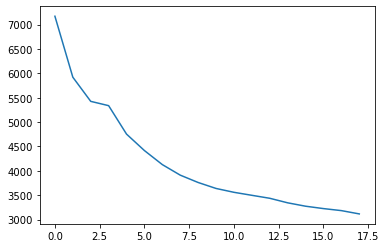

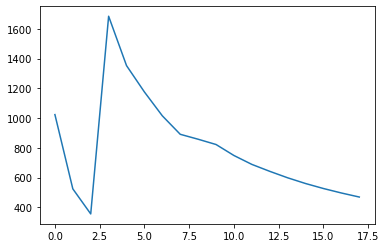

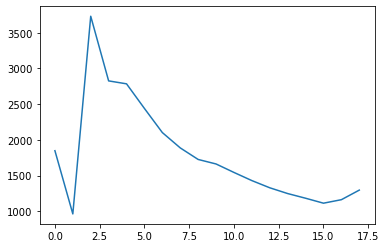

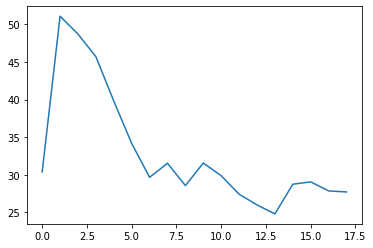

In [5]:
plt.plot(score_metrics['ward'])
plt.figure()
plt.plot(score_metrics['average'])
plt.figure()
plt.plot(score_metrics['complete'])
plt.figure()
plt.plot(score_metrics['single'])

In [9]:
## Therefore, we can chose the n_cluster as 5 we can visualize some of the data
X = normalized
model = AgglomerativeClustering(linkage='ward', n_clusters=40)
model.fit(X)
label = model.labels_

## results

In [24]:
## show the res
# we define a fun to revael very class of result

## para:
# @max_num : shown num
# @the label
# @the class you want to look at
# @raw data
def show_res(max_num,label,cur_label,preprocessed_data):
    global heights
    global data
    
    cur_num = 0
    for i in range(len(label)):
        if label[i] == cur_label:
            cur_num += 1
            # plt.subplot(121)
            # plt.figure()
            plt.xlim(0,7)
            plt.plot(preprocessed_data[i],heights[0])
            plt.ylabel('height')
            plt.xlabel('U(h)/U(10)')
            # plt.subplot(122)
            #plt.plot(data[i],heights[0])
            
            if cur_num >= max_num:
                break
    #print(cur_num)
    return cur_num

the left picture is what the classifier receives and the right one is actual data.

In [ ]:
n_clusters = 40
nums = []
for i in range(20,n_clusters):
    print(i)
    plt.figure()
    cur_num = show_res(50000,label,i,normalized)
    nums.append(cur_num)
#plt.hist(data, bins=40, normed=0, facecolor="blue", edgecolor="black", alpha=0.7)
# print(nums)

plt.figure()
plt.hist(label)